# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.display import display
import matplotlib.pyplot as plt
import mythinkstats as mts
import numpy as np
import pandas as pd
import random
import statsmodels.formula.api as smf

print('Ready')

Ready


## Time series analysis

Load the data from "Price of Weed".

In [2]:
# Finally a normal CSV that can easily be read.
transactions = pd.read_csv('ThinkStats2/code/mj-clean.csv', parse_dates=[5])
print(len(transactions))
transactions.head()

147070


,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


In [3]:
grouped = transactions[['quality', 'date', 'ppg']].groupby(['quality', 'date'])
daily = grouped.aggregate(np.mean)
daily['quality'] = [q for q, t in daily.index.values]
daily['date'] = [t for q, t in daily.index.values]
daily['years'] = (daily.date - daily.date[0]) / np.timedelta64(1, 'Y')
daily.index = np.arange(len(daily))
daily.head()

,ppg,quality,date,years
0,13.384186,high,2010-09-02,0.000000
1,14.459588,high,2010-09-03,0.002738
2,14.923333,high,2010-09-04,0.005476
3,16.667500,high,2010-09-05,0.008214
4,15.537500,high,2010-09-06,0.010952


The following function takes a DataFrame of transactions and compute daily averages.

The following function returns a map from quality name to a DataFrame of daily averages.

In [4]:
# https://www.youtube.com/watch?v=5NPBIwQyPWE

The following plots the daily average price for each quality.

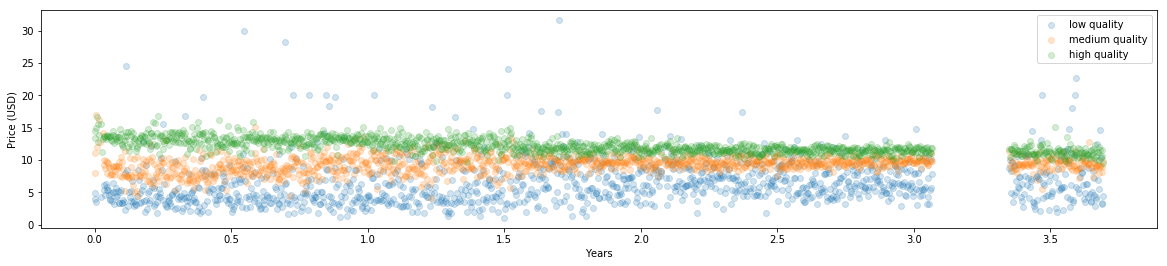

In [5]:
plt.figure(figsize=(20, 4))
grouped = daily.groupby('quality')
for quality in ['low', 'medium', 'high']:
    df = grouped.get_group(quality)
    plt.scatter(df.years, df.ppg, label='%s quality' % quality, alpha=0.2)

plt.legend()
plt.ylabel('Price (USD)')
plt.xlabel('Years')
plt.show()

We can use `statsmodels` to run a linear model of price as a function of time.

Here's what the results look like.

In [6]:
for quality, df in daily.groupby('quality'):
    model = smf.ols('ppg ~ years', data=df)
    results = model.fit()
    display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     989.7
Date:                Wed, 21 Feb 2018   Prob (F-statistic):          3.69e-160
Time:                        10:05:50   Log-Likelihood:                -1510.1
No. Observations:                1241   AIC:                             3024.
Df Residuals:                    1239   BIC:                             3035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4496      0.045    296.080      0.000      13.361      13.539
years         -0.7082      0.023    -31.460      0.000      -0.752      -0.664
==============================================================================
Omnibus:                       56.254   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.992
Skew:                           0.252   Prob(JB):                     9.76e-29
Kurtosis:                       4.497   Cond. No.                         4.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     35.90
Date:                Wed, 21 Feb 2018   Prob (F-statistic):           2.76e-09
Time:                        10:05:50   Log-Likelihood:                -3091.3
No. Observations:                1179   AIC:                             6187.
Df Residuals:                    1177   BIC:                             6197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3616      0.194     27.671      0.000       4.981       5.742
years          0.5683      0.095      5.991      0.000       0.382       0.754
==============================================================================
Omnibus:                      649.338   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6347.614
Skew:                           2.373   Prob(JB):                         0.00
Kurtosis:                      13.329   Cond. No.                         4.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     64.92
Date:                Wed, 21 Feb 2018   Prob (F-statistic):           1.82e-15
Time:                        10:05:50   Log-Likelihood:                -2053.9
No. Observations:                1238   AIC:                             4112.
Df Residuals:                    1236   BIC:                             4122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8791      0.071    125.043      0.000       8.740       9.018
years          0.2832      0.035      8.057      0.000       0.214       0.352
==============================================================================
Omnibus:                      133.025   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.863
Skew:                           0.385   Prob(JB):                    1.02e-137
Kurtosis:                       6.411   Cond. No.                         4.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now let's plot the fitted model with the data.

Here are results for the high quality category:

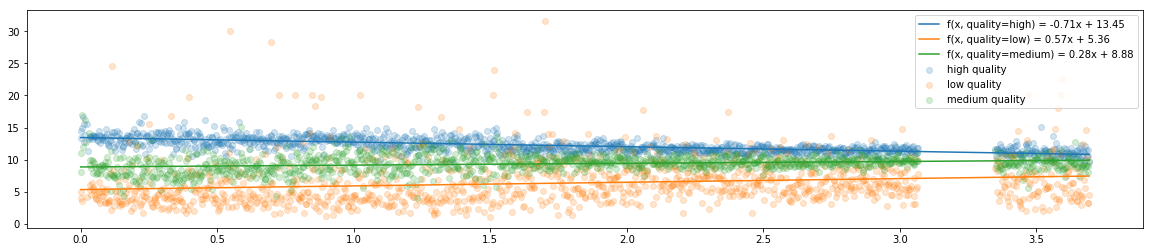

In [7]:
plt.figure(figsize=(20, 4))
for quality, df in daily.groupby('quality'):
    model = smf.ols('ppg ~ years', data=df)
    results = model.fit()
    m, b = results.params['years'], results.params['Intercept']
    
    plt.scatter(df.years, df.ppg, label='%s quality' % quality, alpha=0.2)
    plt.plot(df.years, m * df.years + b, label='f(x, quality=%s) = %.2lfx + %.2lf' % (quality, m, b))
    
plt.legend()
plt.show()

## Moving averages

As a simple example, I'll show the rolling average of the numbers from 1 to 10.

In [8]:
series = np.arange(10)

With a "window" of size 3, we get the average of the previous 3 elements, or nan when there are fewer than 3.

In [9]:
pd.rolling_mean(series, 3)

/home/alex/.virtualenvs/think-series/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """Entry point for launching an IPython kernel.


array([nan, nan,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

The following function plots the rolling mean.

Here's what it looks like for the high quality category.

The exponentially-weighted moving average gives more weight to more recent points.

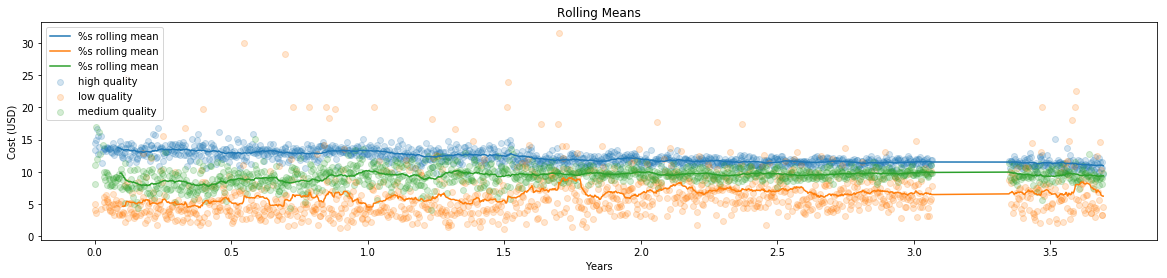

In [10]:
plt.figure(figsize=(20, 4))
for quality, df in daily.groupby('quality'):
    plt.scatter(df.years, df.ppg, label='%s quality' % quality, alpha=0.2)
    plt.plot(df.years, df.ppg.rolling(center=False, window=30).mean(), label='%s rolling mean')
plt.legend()
plt.title('Rolling Means')
plt.xlabel('Years')
plt.ylabel('Cost (USD)')
plt.show()

/home/alex/.virtualenvs/think-series/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,min_periods=0,com=30).mean()
  after removing the cwd from sys.path.


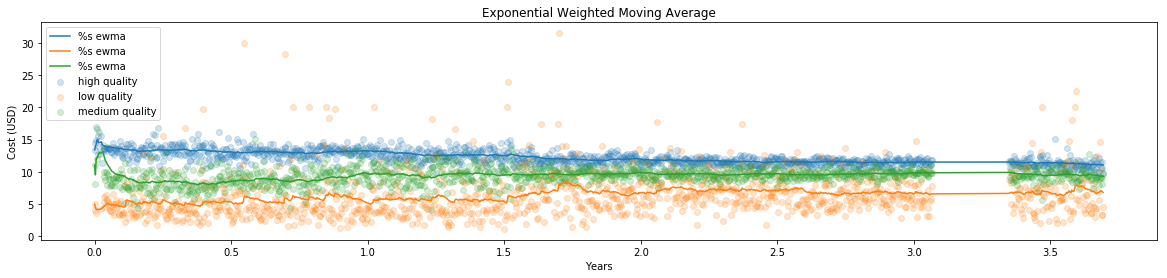

In [11]:
plt.figure(figsize=(20, 4))
for quality, df in daily.groupby('quality'):
    plt.scatter(df.years, df.ppg, label='%s quality' % quality, alpha=0.2)
    plt.plot(df.years, pd.ewma(df.ppg, 30), label='%s ewma')
plt.legend()
plt.title('Exponential Weighted Moving Average')
plt.xlabel('Years')
plt.ylabel('Cost (USD)')
plt.show()

We can use resampling to generate missing values with the right amount of noise.

In [12]:
# Create an entry for every date. There are more missing than just the large gap.
date_index = np.arange(min(daily.date), max(daily.date) + np.timedelta64(1, 'D'), dtype='datetime64[D]')

# For each quality, fill the NaN dates with exponential moving average plus some residual noise.
# Create a new dataframe by concatenating the filled ones.
daily_filled = pd.DataFrame([], columns=daily.columns)
for quality, df in daily.groupby('quality'):
    df_ = pd.DataFrame([], columns=daily.columns, index=date_index)
    df_.loc[df.date] = df.values
    df_.date = date_index
    df_.years = (df_.date - df_.date[0]) / np.timedelta64(1, 'Y')
    df_.quality = quality
    ewma = pd.ewma(df_.ppg, 30)
    noise = np.random.choice((df_.ppg - ewma).dropna(), len(df_), replace=True)
    df_.ppg.fillna(ewma + noise, inplace=True)
    df_['resid'] = df_.ppg - ewma
    df_.index = np.arange(len(df_))
    daily_filled = pd.concat([daily_filled, df_])
    
assert daily_filled.ppg.isna().any() == False
daily_filled.head()

/home/alex/.virtualenvs/think-series/lib/python3.5/site-packages/ipykernel_launcher.py:13: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,min_periods=0,com=30).mean()
  del sys.path[0]


,date,ppg,quality,resid,years
0,2010-09-02,13.384186,high,0.000000,0.000000
1,2010-09-03,14.459588,high,0.528886,0.002738
2,2010-09-04,14.923333,high,0.650848,0.005476
3,2010-09-05,16.667500,high,1.766497,0.008214
4,2010-09-06,15.537500,high,0.500716,0.010952


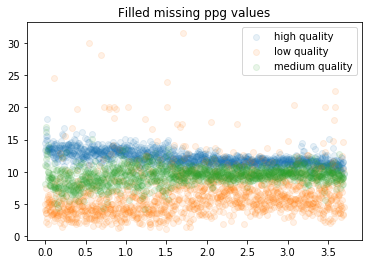

In [13]:
for quality, df in daily_filled.groupby('quality'):
    plt.scatter(df.years, df.ppg, label='%s quality' % quality, alpha=0.1)

plt.title('Filled missing ppg values')
plt.legend()
plt.show()

## Serial correlation

The following function computes serial correlation with the given lag.

In [14]:
def SerialCorr(series, lag=1):
    xs = series[lag:]
    ys = series.shift(lag)[lag:]
    corr = mts.pearson_correlation(xs, ys)
    return corr

for quality, df in daily_filled.groupby('quality'):
    print('%-7s %.3lf %.3lf' % (quality, mts.serial_correlation(df.ppg, 1), SerialCorr(df.ppg, 1)))

high    0.485 0.485
low     0.111 0.111
medium  0.168 0.168


It's not surprising that there are correlations between consecutive days, because there are obvious trends in the data.

It is more interested to see whether there are still correlations after we subtract away the trends.

In [15]:
# These values seem to depend on the randomness in filling missing values.
for quality, df in daily_filled.groupby('quality'):  
    print('%-7s %.3lf' % (quality, mts.serial_correlation(df.resid, lag=1)))

high    0.011
low     0.055
medium  0.012


Even if the correlations between consecutive days are weak, there might be correlations across intervals of one week, one month, or one year.

In [16]:
for quality, df in daily_filled.groupby('quality'):
    for lag in [1, 7, 30, 365]:
        print('%-7s %-6d %-8.3lf %-8.3lf' % (
            quality, lag, mts.serial_correlation(df.resid, lag), SerialCorr(df.resid, lag)))

high    1      0.011    0.011   
high    7      0.014    0.014   
high    30     -0.002   -0.002  
high    365    0.047    0.047   
low     1      0.055    0.055   
low     7      -0.016   -0.016  
low     30     -0.027   -0.027  
low     365    0.028    0.028   
medium  1      0.012    0.012   
medium  7      -0.014   -0.014  
medium  30     0.003    0.003   
medium  365    0.011    0.011   


The strongest correlation is a weekly cycle in the medium quality category.

## Autocorrelation

The autocorrelation function is the serial correlation computed for all lags.

We can use it to replicate the results from the previous section.

In [17]:
# 1, -0.046, 0.021, -0.011, 0.047
import statsmodels.tsa.stattools as smtsa

filled = daily_filled.groupby('quality').get_group('high')
acf = smtsa.acf(filled.resid, nlags=365, unbiased=True)
print('%0.2g, %.2g, %0.2g, %0.2g, %0.2g' % 
      (acf[0], acf[1], acf[7], acf[30], acf[365]))

1, 0.011, 0.014, -0.0019, 0.045


/home/alex/.virtualenvs/think-series/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:
for quality, df in daily_filled.groupby('quality'):
    print('%-7s' % quality, '\t'.join('%d:%.4lf' % x for x in mts.autocorrelation(df.resid, [1, 2, 7, 30, 365])))

high    1:0.0113	2:-0.0168	7:0.0143	30:-0.0019	365:0.0466
low     1:0.0555	2:0.0256	7:-0.0161	30:-0.0269	365:0.0276
medium  1:0.0123	2:0.0711	7:-0.0144	30:0.0026	365:0.0113


To get a sense of how much autocorrelation we should expect by chance, we can resample the data (which eliminates any actual autocorrelation) and compute the ACF.

Here's what the real ACFs look like.  The gray regions indicate the levels we expect by chance.

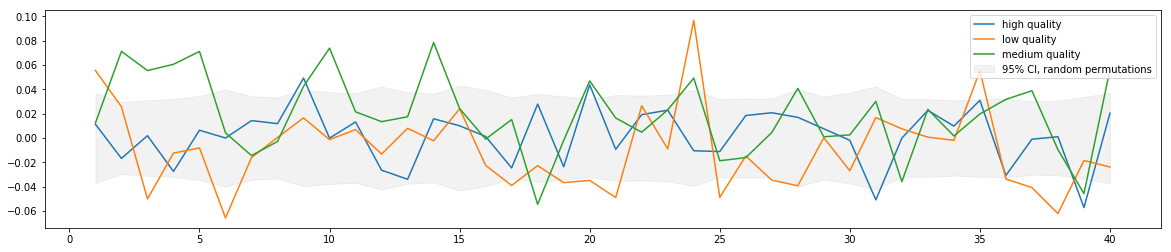

In [19]:
# Note: I seem to get some more extreme autocorrelations and less extreme permuted
# autocorrelations than Downey's figure.
iters = 101
lags = np.arange(1, 41)
plt.figure(figsize=(20, 4))

# Run simulation, storing permuted autocorrelations.
permuted = np.zeros((iters, len(lags)))
for i in range(iters):
    sample = daily_filled.resid.sample(frac=1.0, replace=True)
    X, Y = zip(*mts.autocorrelation(sample, lags))
    permuted[i,:] = np.abs(Y)

# Compute and fill the confidence intervals at each lag.
his = np.percentile(permuted, 97.5, axis=0)
plt.fill_between(lags, -1 * his, his, color='gray', alpha=0.1, label='95% CI, random permutations')

# Plot the actual autocorrelations.
for quality, df in daily_filled.groupby('quality'):
    X, Y = zip(*mts.autocorrelation(df.resid, lags))
    plt.plot(X, Y, label='%s quality' % quality)
    
plt.legend()
plt.show()

To show what a strong weekly cycle would look like, we have the option of adding a price increase of 1-2 dollars on Friday and Saturdays.

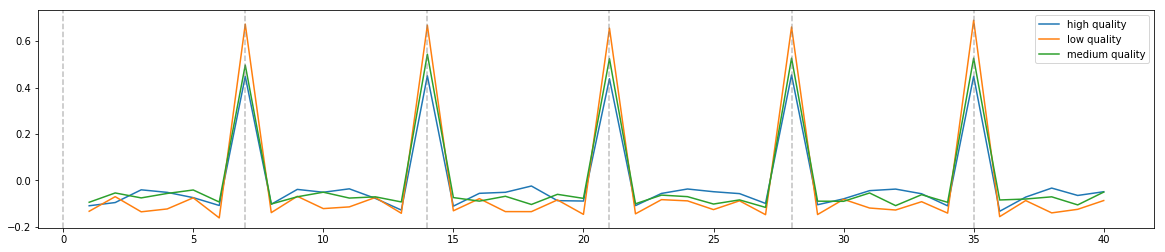

In [20]:
# Introduce a fake correlation at every *offset* days.
plt.figure(figsize=(20, 4))
lags = np.arange(1, 41)
offset = 5
for quality, df in daily_filled.groupby('quality'):
    mask, = np.where(np.arange(len(df)) % 7 == 0)
    resid = df.resid.values.copy()
    resid[mask] = resid.max() * 0.5
    X, Y = zip(*mts.autocorrelation(resid, lags))
    plt.plot(X, Y, label='%s quality' % quality)

for i in mask:
    if i > len(lags): break
    plt.axvline(i, linestyle='--', color='gray', alpha=0.5)
    
plt.legend()
plt.show()

## Prediction

The simplest way to generate predictions is to use `statsmodels` to fit a model to the data, then use the `predict` method from the results.

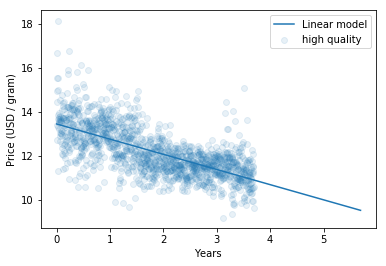

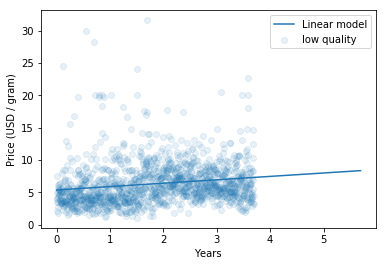

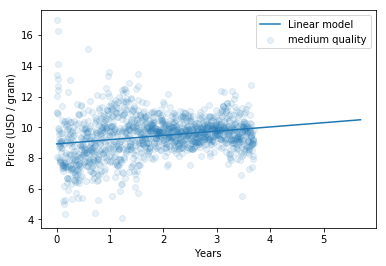

In [21]:
nb_years = 2

for quality, df in daily_filled.groupby('quality'):
    model = smf.ols('ppg ~ years', data=df)
    results = model.fit()
    years = np.linspace(0, max(df.years) + nb_years, len(df.years) + (365 * nb_years))
    pred = results.predict(pd.DataFrame({'years': years}))
    plt.scatter(df.years, df.ppg, label='%s quality' % quality, alpha=0.1)
    plt.plot(years, pred.values, label='Linear model')
    plt.ylabel('Price (USD / gram)')
    plt.xlabel('Years')
    plt.legend()
    plt.show()

When we generate predictions, we want to quatify the uncertainty in the prediction.  We can do that by resampling.  The following function fits a model to the data, computes residuals, then resamples from the residuals to general fake datasets.  It fits the same model to each fake dataset and returns a list of results.

To generate predictions, we take the list of results fitted to resampled data.  For each model, we use the `predict` method to generate predictions, and return a sequence of predictions.

If `add_resid` is true, we add resampled residuals to the predicted values, which generates predictions that include predictive uncertainty (due to random noise) as well as modeling uncertainty (due to random sampling).

To visualize predictions, I show a darker region that quantifies modeling uncertainty and a lighter region that quantifies predictive uncertainty.

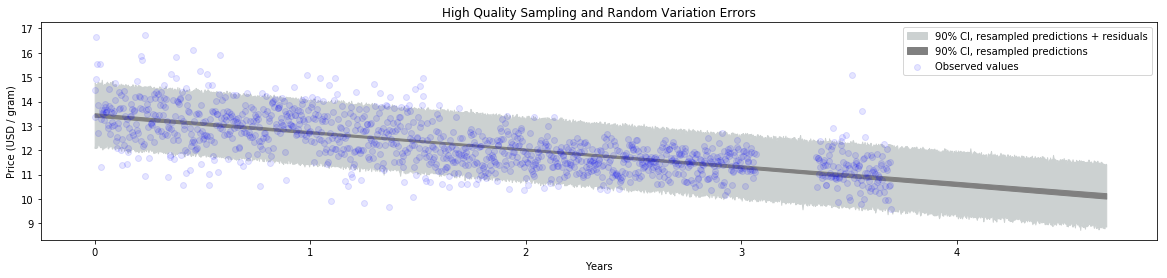

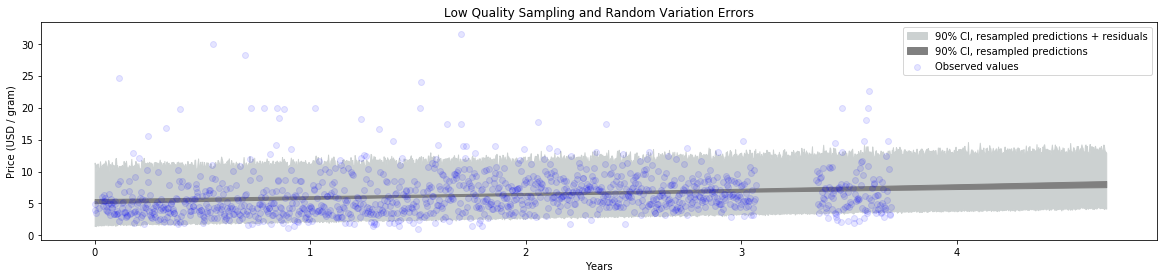

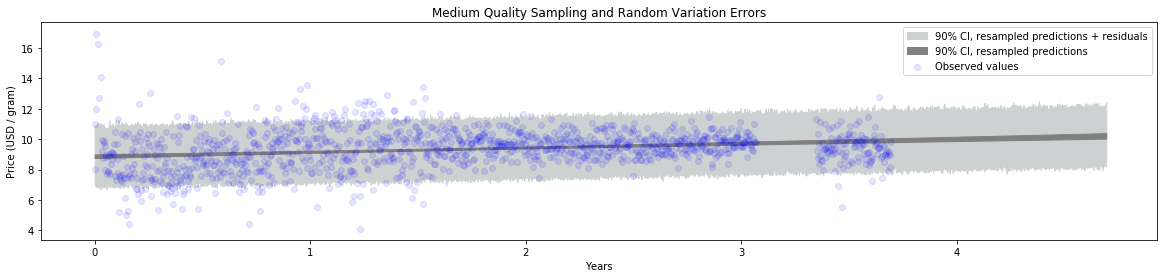

In [22]:
# I'm not sure why Downey's predictions with residuals come out relatively smooth
# whereas mine are rather jagged, but the CI ranges seem to correspond.

nb_years = 1
iters = 1000
for quality, df in daily.groupby('quality'):
    
    plt.figure(figsize=(20, 4))
    
    # Dataframe with past and future years.
    years = pd.DataFrame({
        'years': np.linspace(0, df.years.max() + nb_years, int((df.years.max() + nb_years) * 365))})
    
    # Run the model on the true data.
    model = smf.ols('ppg ~ years', data=df)
    results = model.fit()
    resid = df.ppg - results.fittedvalues
    
    # Re-run the model on data altered by resampling the residuals.
    # Store each iteration's predictions with and without residuals.
    resampled_preds = np.zeros((iters, len(years)), dtype=np.float32)
    resampled_preds_resid = np.zeros((iters, len(years)), dtype=np.float32)
    for i in range(iters):
        
        # Make a dataframe with randomized ppg to simulate sampling error and fit a model to it.
        df_ = pd.DataFrame({
            'ppg': results.fittedvalues + np.random.choice(resid, len(df), replace=True),
            'years': df.years
        })
        model = smf.ols('ppg ~ years', data=df_).fit()
        
        # Make predictions for past and future years to represent sampling error.
        preds = model.predict(years).values
        resampled_preds[i,:] = preds
        
        # Add residuals to predictions to represent random variation.
        resampled_preds_resid[i,:] = preds + np.random.choice(resid, len(years), replace=True)
        
    # Plot 90% CI for sampling error with random variation.
    CI = (np.percentile(resampled_preds_resid, 5, axis=0),
          np.percentile(resampled_preds_resid, 95, axis=0))
    plt.fill_between(years.years, *CI, color='#CCD1D1', label='90% CI, resampled predictions + residuals')
    
    # Plot 90% CI for sampling error.
    CI = (np.percentile(resampled_preds, 5, axis=0), np.percentile(resampled_preds, 95, axis=0))
    plt.fill_between(years.years, *CI, color='gray', label='90% CI, resampled predictions' )
    
    # Plot the observed values.
    plt.scatter(df.years, df.ppg, color='blue', alpha=0.1, label='Observed values')
    
    plt.title('%s Quality Sampling and Random Variation Errors' % quality.capitalize())
    plt.xlabel('Years')
    plt.ylabel('Price (USD / gram)')
    plt.legend()
    plt.show()

## Exercises

**Exercise:**   The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

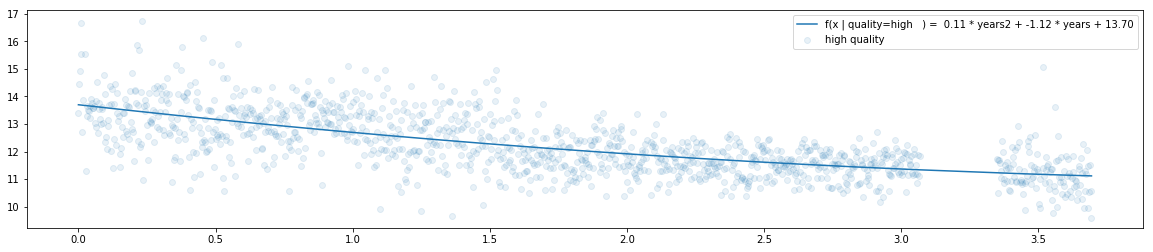

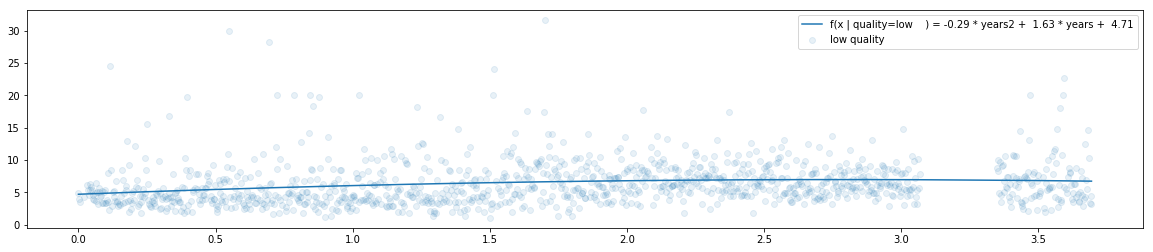

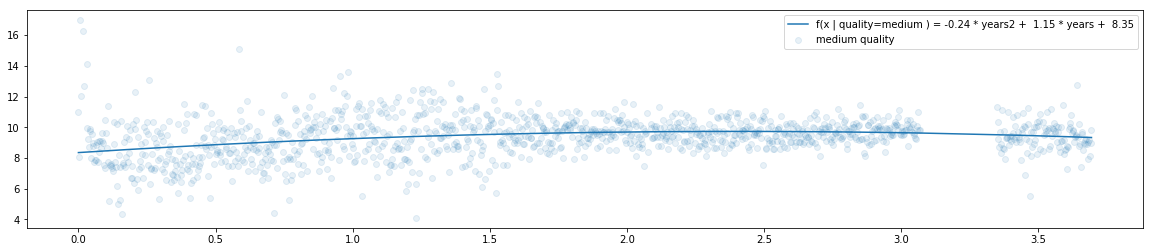

In [23]:
# You can see some curvature in the model that better matches the change in prices.
# Not sure why this produces a pandas warning.

pd.options.mode.chained_assignment = None  # default='warn'

for quality, df in daily.groupby('quality'):
    df['years2'] = df.years.values ** 2
    formula = 'ppg ~ years + years2'
    model = smf.ols(formula, data=df)
    results = model.fit()
    label = 'f(x | quality=%-7s) = %5.2lf * years2 + %5.2lf * years + %5.2lf' % (
        quality, results.params['years2'], results.params['years'], results.params['Intercept'])
    plt.figure(figsize=(20, 4))
    plt.scatter(df.years, df.ppg, label='%s quality' % quality, alpha=0.1)
    plt.plot(df.years, results.fittedvalues, label=label)
    plt.legend()
    plt.show()

**Exercise:** Write a definition for a class named `SerialCorrelationTest` that extends `HypothesisTest` from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [24]:
# Solution goes here
def simulate_serial_correlations(values, lag, iters):
    corrs = [
        mts.serial_correlation(np.random.choice(values, len(values), replace=True), lag)
        for _ in range(iters)]
    pmf = pd.Series(np.abs(corrs)).value_counts(normalize=True)
    cdf = mts.pmf_to_cdf(pmf)
    return cdf

iters = 250
lags = [1, 7, 30]

# Test the raw price data.
print('Raw prices')
print('Quality lag s-corr  pvalue')
for quality, df in daily.groupby('quality'):
    for lag in lags:
        obs_scorr = abs(mts.serial_correlation(df.ppg, lag=lag))
        cdf_scorr = simulate_serial_correlations(df.ppg, lag, iters)
        pval = mts.cdf_pvalue(cdf_scorr, obs_scorr)
        print('%-7s %-3d %-7.5lf %-7.5lf' % (quality, lag, obs_scorr, pval))
    
print('=' * 10)
print('Linear model residuals')
print('Quality lag s-corr  pvalue')
for quality, df in daily.groupby('quality'):
    formula = 'ppg ~ years'
    model = smf.ols(formula, data=df)
    resid = df.ppg - model.fit().fittedvalues
    for lag in lags:
        obs_scorr = abs(mts.serial_correlation(resid, lag=lag))
        cdf_scorr = simulate_serial_correlations(resid, lag, iters)
        pval = mts.cdf_pvalue(cdf_scorr, obs_scorr)
        print('%-7s %-3d %-7.5lf %-7.5lf' % (quality, lag, obs_scorr, pval))
    
print('=' * 10)
print('Quadratic model residuals')
print('Quality lag s-corr  pvalue')
for quality, df in daily.groupby('quality'):
    df['years2'] = df.years ** 2
    formula = 'ppg ~ years + years2'
    model = smf.ols(formula, data=df)
    resid = df.ppg - model.fit().fittedvalues
    for lag in lags:
        obs_scorr = abs(mts.serial_correlation(resid, lag=lag))
        cdf_scorr = simulate_serial_correlations(resid, lag, iters)
        pval = mts.cdf_pvalue(cdf_scorr, obs_scorr)
        print('%-7s %-3d %-7.5lf %-7.5lf' % (quality, lag, obs_scorr, pval))

Raw prices
Quality lag s-corr  pvalue
high    1   0.48484 0.00000
high    7   0.48440 0.00000
high    30  0.46312 0.00000
low     1   0.11648 0.00000
low     7   0.04044 0.16400
low     30  0.04764 0.10400
medium  1   0.15993 0.00000
medium  7   0.10625 0.00000
medium  30  0.10567 0.00000
Linear model residuals
Quality lag s-corr  pvalue
high    1   0.07564 0.00000
high    7   0.08047 0.00000
high    30  0.06180 0.04800
low     1   0.08943 0.00400
low     7   0.01173 0.70400
low     30  0.01942 0.55600
medium  1   0.11551 0.00000
medium  7   0.04917 0.11600
medium  30  0.04850 0.09600
Quadratic model residuals
Quality lag s-corr  pvalue
high    1   0.05603 0.03600
high    7   0.06293 0.01600
high    30  0.04362 0.15200
low     1   0.08216 0.00800
low     7   0.00378 0.92800
low     30  0.01344 0.63600
medium  1   0.08083 0.01200
medium  7   0.00386 0.87600
medium  30  0.00253 0.96400


**Worked example:** There are several ways to extend the EWMA model to generate predictions. One of the simplest is something like this:

1. Compute the EWMA of the time series and use the last point as an intercept, `inter`.

2. Compute the EWMA of differences between successive elements in the time series and use the last point as a slope, `slope`.

3. To predict values at future times, compute `inter + slope * dt`, where `dt` is the difference between the time of the prediction and the time of the last observation.


As an exercise, run this analysis again for the other quality categories.

/home/alex/.virtualenvs/think-series/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,span=30,min_periods=0).mean()
  if __name__ == '__main__':
/home/alex/.virtualenvs/think-series/lib/python3.5/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,span=365,min_periods=0).mean()


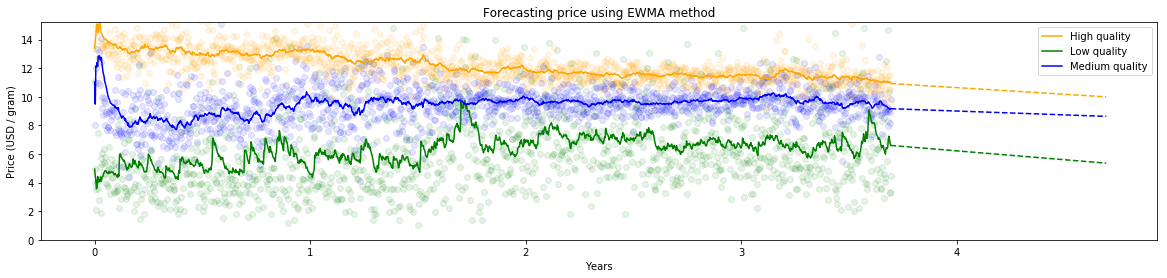

In [83]:
plt.figure(figsize=(20, 4))
colors = iter(['orange', 'green', 'blue'])

for quality, df in daily_filled.groupby('quality'):
    
    color = next(colors)
    
    # Compute the 30-day EWMA for ppg.
    df['ppg_ewma'] = pd.ewma(df.ppg, span=30)
    
    # Plot the observed values.
    plt.plot(df.years, df.ppg_ewma, label='%s quality' % quality.capitalize(), color=color)
    plt.scatter(df.years, df.ppg, color=color, alpha=0.1, label=None)
    
    # Compute and plot daily changes in price per gram.
    slopes = df.ppg.diff()
    
    # Compute the EWMA for daily changes in year-long intervals.
    df['slope_ewma'] = pd.ewma(slopes, span=365)
    
    # Extract the last inter and the mean of the last 30 slopes
    start = df.years.max()
    inter = df.ppg_ewma.values[-1]
    slope = df.slope_ewma.values[-30:].mean()
    
    # Compute and plot the predicted values.
    new_years = np.linspace(df.years.max(), df.years.max() + 1, 365)
    new_ppg = np.arange(1, 366) * slope + inter
    plt.plot(new_years, new_ppg, linestyle='--', color=color)
    
plt.title('Forecasting price using EWMA method')
plt.ylabel('Price (USD / gram)')
plt.xlabel('Years')
plt.ylim(0, np.percentile(daily_filled.ppg, 99))
plt.legend()
plt.show()